## **1- Importing Libraries**

In [ ]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import emoji
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.ticker as ticker
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

In [45]:
youtube_stats = pd.read_excel('/Users/godzilla/Desktop/Data Analysis Projects/Youtube/Project/cleaned_data/channel_stats.xlsx')


In [28]:
youtube_data = pd.read_csv('/Users/godzilla/Desktop/Data Analysis Projects/Youtube/Project/cleaned_data/cleaned_channels_data.csv')


In [29]:
sentiment_data = pd.read_excel('/Users/godzilla/Desktop/Data Analysis Projects/Youtube/Project/cleaned_data/cleaned_comments_data.xlsx')

In [30]:
# Merge the two DataFrames on the Video_ID column
youtube_data_subset = youtube_data[["Channel_Name", "Title", "Video_ID"]]
sentiment_data = sentiment_data.merge(youtube_data_subset, on="Video_ID")



In [31]:
sentiment_data.head()

,Video_ID,comment_id,author,comment,like_count,published_at,total_replies,Channel_Name,Title
0,l14K2EnD548,UCOBCx96bEpL7dDdfBTFOkQQ,U Khalid,Impressed by guest she is right about AI doing lot of damage as far as jobs are concerned,0,2023-08-09T21:54:29Z,0,Sundas Khalid,AI Will Replace Tech Jobs: From ex-FAANG Software Engineer
1,l14K2EnD548,UCYX-G0t7FYHQM_hxSdNqazw,Lorenzo Pla Serrano,I loved this video queens,0,2023-08-08T22:16:37Z,0,Sundas Khalid,AI Will Replace Tech Jobs: From ex-FAANG Software Engineer
2,l14K2EnD548,UCodPJ-SoT1WetGEbXgIA5LA,dorcel marcs-(Je.Handicapo♿),Your girlfriend knows better than her I dont have a MacBook,0,2023-08-08T14:37:34Z,0,Sundas Khalid,AI Will Replace Tech Jobs: From ex-FAANG Software Engineer
3,l14K2EnD548,UCvVHV5l7u25wv24pQcYgRFg,Invader G,She goes to google then does an unimaginable move to quit her job in 2023 and then super surprisingly possibly got an even more high paying remote job \n\nCut to me who is barely scraping by in my own tech job putting a hold on my dreams as I recover from my mental illness Im living in a ghost town of a city so that might be why,1,2023-08-08T03:52:46Z,2,Sundas Khalid,AI Will Replace Tech Jobs: From ex-FAANG Software Engineer
4,l14K2EnD548,UC3LOkL81ytBdgrrbVThgJMA,Swathi Banna,The zooming in and out is quite disturbing,0,2023-08-08T02:15:23Z,0,Sundas Khalid,AI Will Replace Tech Jobs: From ex-FAANG Software Engineer


## **2- Get Vader Sentiments**

In [32]:
# Initialize the SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis to the 'Title' column
sentiment_data['vader_sentiment'] = sentiment_data['comment'].apply(lambda x: sentiment.polarity_scores(x))
sentiment_data['vader_neg_sentiment'] = sentiment_data['vader_sentiment'].apply(lambda x: x['neg'])
sentiment_data['vader_pos_sentiment'] = sentiment_data['vader_sentiment'].apply(lambda x: x['pos'])
sentiment_data['vader_comp_sentiment'] = sentiment_data['vader_sentiment'].apply(lambda x: x['compound'])

In [33]:
# Display the most positive titles
vader_positive = sentiment_data.sort_values(by=['vader_comp_sentiment'], ascending=False)[['Video_ID', 'Channel_Name','comment','vader_pos_sentiment']].head(10)
vader_positive

Video_ID      Channel_Name  \
51650  hKuUpV11RY0       Justin Shin   
22143  9bB4rI0Cjko        Krish Naik   
77718  eBCU-tqLGfQ  Nicholas Renotte   
21923  2JJmN-SlCSU        Krish Naik   
77704  2VP9nOWiJ04  Nicholas Renotte   
78692  cCmGg_Pn9K8  Nicholas Renotte   
23712  7kJgJkB_lo8        Krish Naik   
54864  DW55gaQ_Egk           Ken Jee   
42218  Q-x0xwHAOUQ        codebasics   
42570  nZromH6F7R0        codebasics   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [34]:
# Display the most negative titles
vader_negative = sentiment_data.sort_values(by=['vader_comp_sentiment'], ascending=True)[['Video_ID', 'Channel_Name', 'vader_neg_sentiment']].head(10)
vader_negative

,Video_ID,Channel_Name,vader_neg_sentiment
50446,Vt6loGK9Adc,codebasics,0.241
67164,K45k-gNNzGo,Darshil Parmar,0.378
71970,ScJZB-u7w6c,The Almost Astrophysicist,0.252
43575,iyvxI_Ah3qc,codebasics,0.211
21674,_AWQ4Myxlcg,Krish Naik,0.257
3247,VchXKvfCi3s,Luke Barousse,0.122
32686,tiHRnuvKD3Y,Krish Naik,0.432
39387,8rO7ztF4NtU,Alex The Analyst,0.371
15483,xCmKI5ZutKw,Krish Naik,0.194
75674,8e1SK0K8gtI,Python Programmer,0.161


In [35]:
vader_neutral = sentiment_data.query('vader_comp_sentiment == 0').sort_values(by=['vader_comp_sentiment'], ascending=True)[['Video_ID', 'Channel_Name','comment', 'vader_neg_sentiment']].head(10)
vader_neutral

,Video_ID,Channel_Name,comment,vader_neg_sentiment
8,l14K2EnD548,Sundas Khalid,У меня такое ощущение что мои две бухие одноклассницы говорят по английски,0.0
49380,DdGVBZv46PI,codebasics,Hello can some1 tell me why we use dot in between math and power,0.0
49378,DdGVBZv46PI,codebasics,What is the difference between modules and functions,0.0
49375,DdGVBZv46PI,codebasics,Hello Sir i wanted to ask one question spent near about a day to sort out this but could not do this this is my code for function file module file i tried but area is not showing in module file \n\nfunction file code \ndef calculate_square_arealength_x000D_\n area lengthlength\nmodule file code\nimport functions_x000D_\nvar functionscalculate_square_area2_x000D_\nprintvar,0.0
49374,DdGVBZv46PI,codebasics,unable to use maths function in pycharm,0.0
49369,8tCe1P_cgoY,codebasics,Thankyou,0.0
49367,8tCe1P_cgoY,codebasics,printrent\n1220\n\nOr\n\nrent\n1220\n\nWhat is the difference between the two\nBoth means the same,0.0
49381,DdGVBZv46PI,codebasics,how do i specify sys path on linux operation sir,0.0
49366,8tCe1P_cgoY,codebasics,thankyou for your efforts sirloveyou3000,0.0
49358,8tCe1P_cgoY,codebasics,Sir i am using Jupyter notebook,0.0


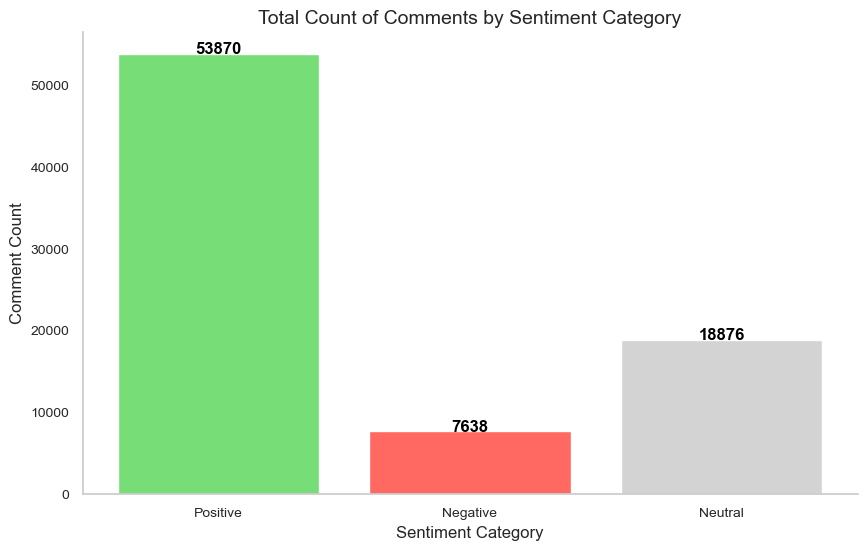

In [90]:
# Count the total comments for each sentiment category
positive_count = sentiment_data[sentiment_data['vader_comp_sentiment'] > 0].shape[0]
negative_count = sentiment_data[sentiment_data['vader_comp_sentiment'] < 0].shape[0]
neutral_count = sentiment_data[sentiment_data['vader_comp_sentiment'] == 0].shape[0]

# Data for plotting
sentiment_categories = ['Positive', 'Negative', 'Neutral']
comment_counts = [positive_count, negative_count, neutral_count]
colors = ['#77dd77', '#ff6961', '#d3d3d3']  # Custom colors for each category

# Create a bar chart with custom styling
plt.figure(figsize=(10, 6))
bars = plt.bar(sentiment_categories, comment_counts, color=colors)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 20, round(yval), ha='center', color='black', fontweight='bold')

plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Comment Count', fontsize=12)
plt.title('Total Count of Comments by Sentiment Category', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.grid(False, axis='both')  

plt.show()


## **3- Get Textblob Sentiments**

In [36]:
sentiment_data['Textblob Polarity'] = sentiment_data['comment'].map(lambda text: TextBlob(str(text)).sentiment.polarity)
sentiment_data['title_len'] = sentiment_data['comment'].astype(str).apply(len)
sentiment_data['word_count'] = sentiment_data['comment'].apply(lambda x: len(str(x).split()))

In [37]:
# Most positive Titles
textblob_positive = sentiment_data.sort_values(by=['Textblob Polarity'], ascending=False)[['Video_ID', 'Channel_Name', 'comment', 'Textblob Polarity']].head(10)
textblob_positive

,Video_ID,Channel_Name,comment,Textblob Polarity
51199,Ia1i5EIGp9k,codebasics,Best explanation,1.0
7198,weCZ1WynbMI,techTFQ,can anybody help me with choosing the best sql for beginners plz,1.0
53231,sHRq-LshG3U,Ken Jee,Best mentor award Ken Jee,1.0
53136,SaWxVk7rDp4,Ken Jee,Perfectly balanced as all shorts should be,1.0
53018,KfpOuSH9gDc,Ken Jee,Best advise from video start with Kaggle and then turn to GitHub,1.0
7104,h48xzQR3wNQ,techTFQ,Thank you for your wonderful video it helped me a lot,1.0
7108,h48xzQR3wNQ,techTFQ,Perfect explanition,1.0
52920,S4Lei5mOppc,Ken Jee,Excellent video I talk about this all the time with my closest friends,1.0
52847,TjGFBQC27ng,Ken Jee,Excellent video of an often overlooked aspect of business,1.0
52838,TjGFBQC27ng,Ken Jee,KEN is the BEST,1.0


In [38]:
# Most negative Titles
textblob_negative = sentiment_data.sort_values(by=['Textblob Polarity'], ascending=True)[['Video_ID','Channel_Name', 'comment', 'Textblob Polarity']].head(10)
textblob_negative

,Video_ID,Channel_Name,comment,Textblob Polarity
57358,9zUhoeEeAXI,How to Power BI,Pie charts are evil,-1.0
16945,O1HmsAnZvUA,Krish Naik,Acer predator has worst warranty support Please keep in mind,-1.0
37901,zmIdC0_0BgY,Alex The Analyst,boring already a billion python beginner tutorials on the internet,-1.0
8223,j09EQ-xlh88,techTFQ,Abeg why is is boring like this,-1.0
73242,hCjIuqcnaYA,Python Programmer,That is just evil,-1.0
17139,bZnGOoi18PA,Krish Naik,The worst thing is when all your relatives have this mentality,-1.0
19945,b71kL6Z00yM,Krish Naik,Worst teacher,-1.0
22491,k3dhYPgAvmU,Krish Naik,worst case On3,-1.0
77030,pkFqpOwBbPs,Nicholas Renotte,Awful drawing,-1.0
72578,FuAWMm_FOWs,Python Programmer,Threads experience is horrible,-1.0


In [39]:
# Most neutral Titles
textblob_neutral = sentiment_data[sentiment_data['Textblob Polarity'] == 0].sort_values(by=['Video_ID','Textblob Polarity'], ascending=False)[['Video_ID', 'Channel_Name', 'comment',  'Textblob Polarity']].head(10)
textblob_neutral

,Video_ID,Channel_Name,comment,Textblob Polarity
36150,zzRQY_LgJyk,Krish Naik,I implemented the same code and also downloaded the required xml and video files as mentioned by the project On running the two blocks of code in the video detection starts that is how it is shown in the above video But when I do the same noting happens Can someone suggest something,0.0
36151,zzRQY_LgJyk,Krish Naik,My video is not downloading and no errorany suggestion,0.0
36152,zzRQY_LgJyk,Krish Naik,Car detection me kaun sa srs used krte hai,0.0
36153,zzRQY_LgJyk,Krish Naik,why me error,0.0
49126,zyib_6XZW0g,codebasics,What benefits did you get from goat milk I also want to drink,0.0
49128,zyib_6XZW0g,codebasics,Drinking milk is gross I dont know who suggested this,0.0
49130,zyib_6XZW0g,codebasics,Goat milk video desi banao,0.0
49132,zyib_6XZW0g,codebasics,How do nomads move They occupy any land they like build a temporary house and then move out to another land How do they choose the land for temporary staying,0.0
49134,zyib_6XZW0g,codebasics,बकर क दध अचछ व सवसथय वधक हत ह इतन दर जन क बजय एक य द बकरय घर पर ह रख कर दध दह कर त और भ लभदयक हग,0.0
49142,zyib_6XZW0g,codebasics,Hi where can I PM you Need to speak to you about code basics\n\nmy email is mdlessonscontactgmailcom,0.0


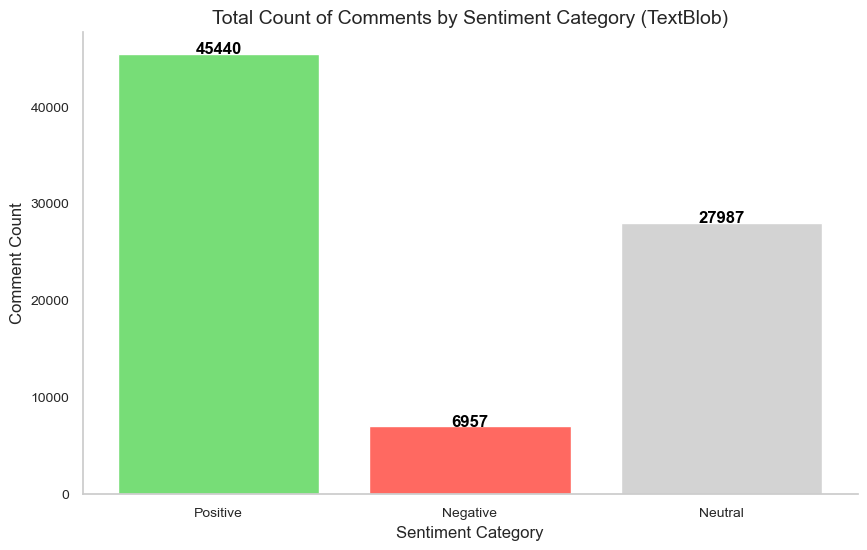

In [91]:
# Count the total comments for each sentiment category
positive_count = sentiment_data[sentiment_data['Textblob Polarity'] > 0].shape[0]
negative_count = sentiment_data[sentiment_data['Textblob Polarity'] < 0].shape[0]
neutral_count = sentiment_data[sentiment_data['Textblob Polarity'] == 0].shape[0]

# Data for plotting
sentiment_categories = ['Positive', 'Negative', 'Neutral']
comment_counts = [positive_count, negative_count, neutral_count]
colors = ['#77dd77', '#ff6961', '#d3d3d3']  # Custom colors for each category

# Create a bar chart with custom styling
plt.figure(figsize=(10, 6))
bars = plt.bar(sentiment_categories, comment_counts, color=colors)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 20, round(yval), ha='center', color='black', fontweight='bold')

plt.xlabel('Sentiment Category', fontsize=12)
plt.ylabel('Comment Count', fontsize=12)
plt.title('Total Count of Comments by Sentiment Category (TextBlob)', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)  
plt.gca().spines['right'].set_visible(False)  
plt.grid(False, axis='both')  

plt.show()


## **4-EDA**

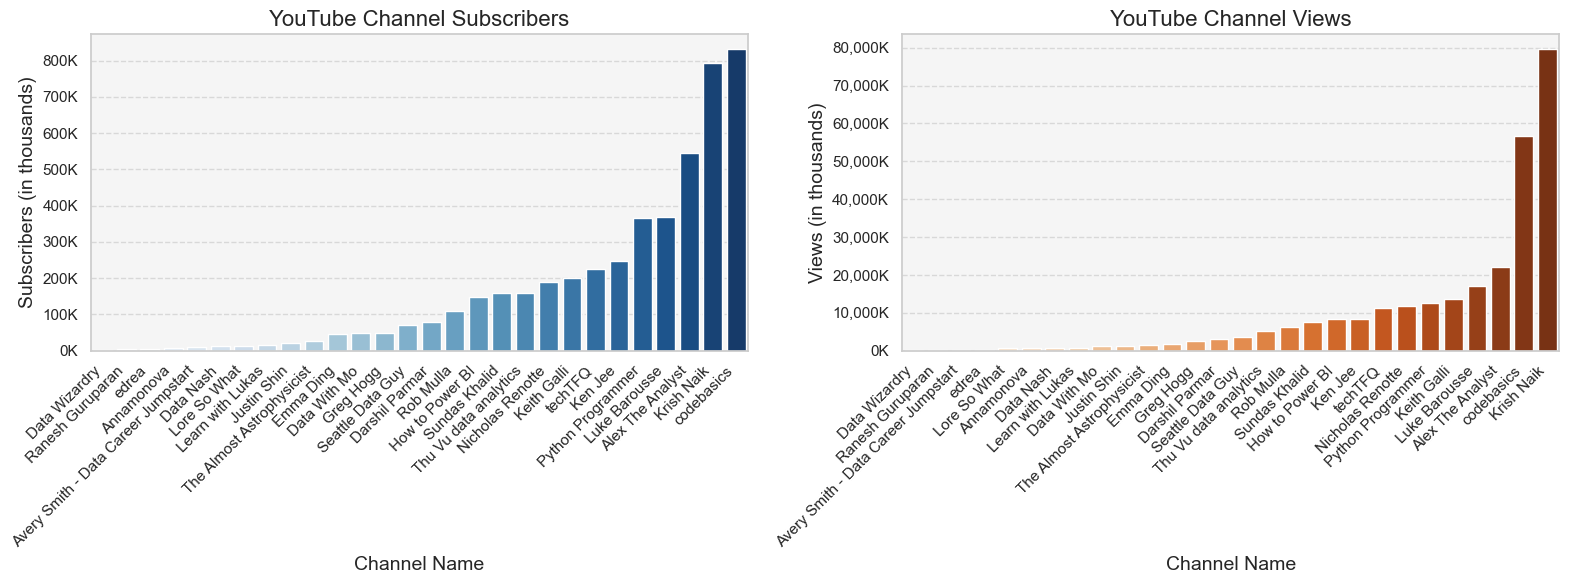

In [57]:
# Set up the main figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# First subplot: Subscribers
sns.barplot(x='Channel_Name', y='Subscribers', data=youtube_stats.sort_values('Subscribers', ascending=True), palette='Blues', ax=ax1)
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax1.set_title("YouTube Channel Subscribers", fontsize=16)
ax1.set_xlabel("Channel Name", fontsize=14)
ax1.set_ylabel("Subscribers (in thousands)", fontsize=14)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
ax1.yaxis.grid(True, linestyle='--', alpha=0.7)
ax1.set_facecolor("#f5f5f5")

# Second subplot: Views
sns.barplot(x='Channel_Name', y='Views', data=youtube_stats.sort_values('Views', ascending=True), palette='Oranges', ax=ax2)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x/1000) + 'K'))
ax2.set_title("YouTube Channel Views", fontsize=16)
ax2.set_xlabel("Channel Name", fontsize=14)
ax2.set_ylabel("Views (in thousands)", fontsize=14)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
ax2.yaxis.grid(True, linestyle='--', alpha=0.7)
ax2.set_facecolor("#f5f5f5")

# Adjust layout
plt.tight_layout()
plt.show()


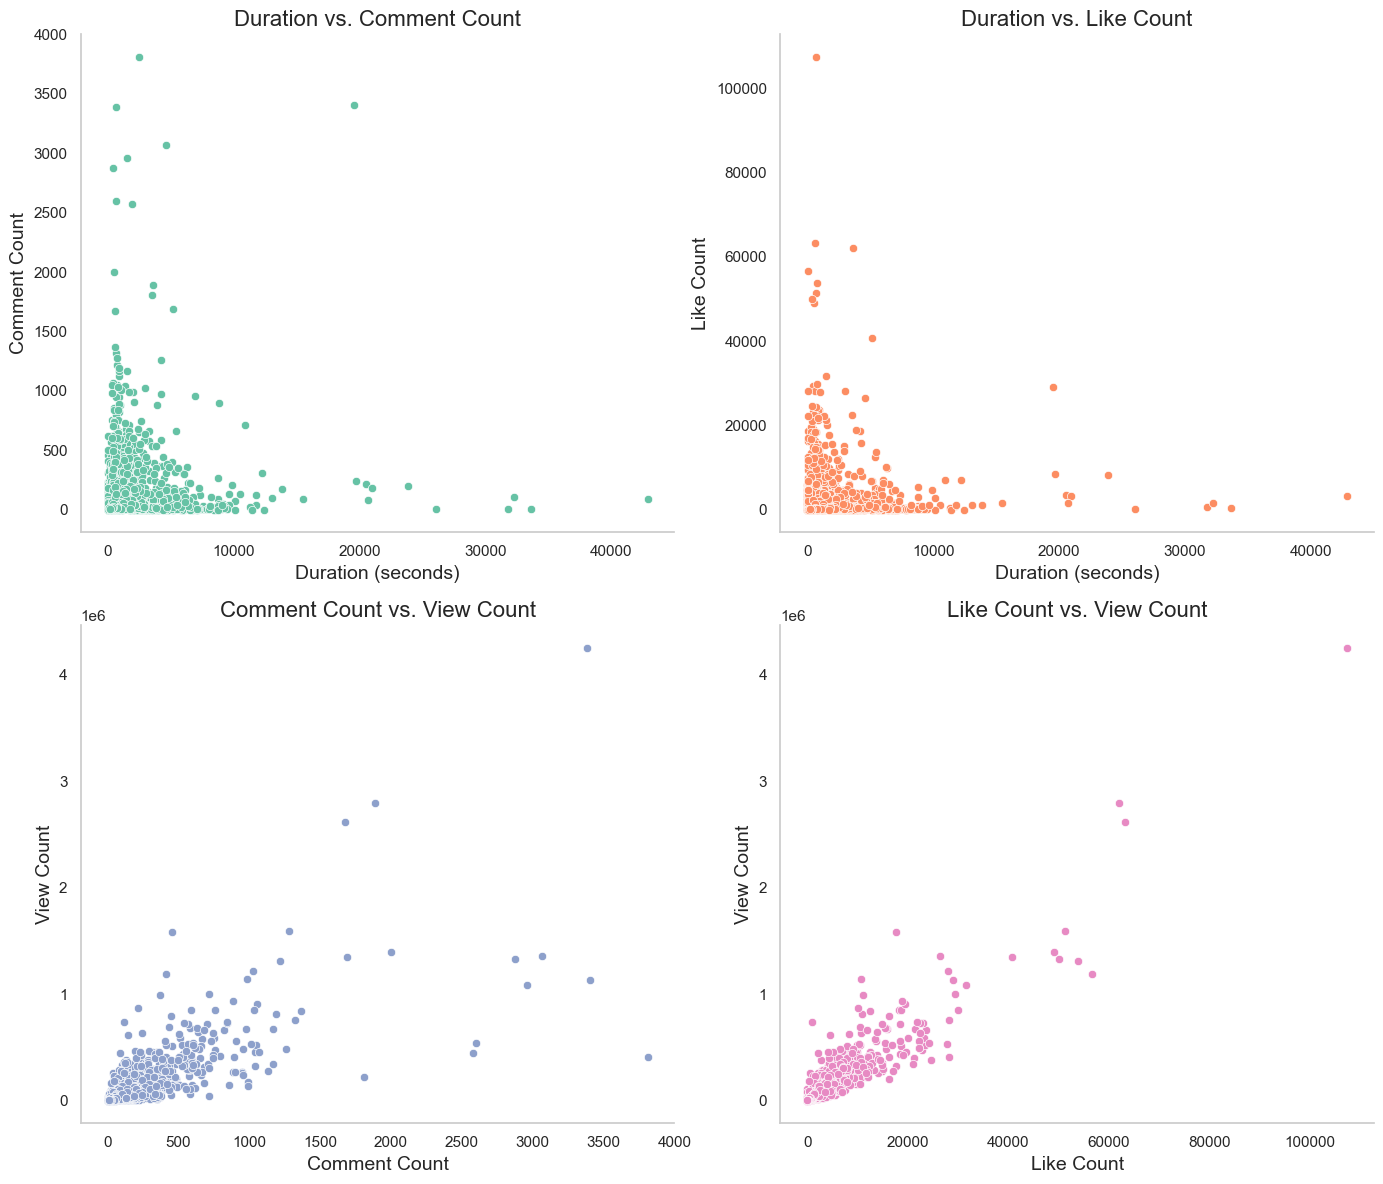

In [66]:
# Set up the main figure and subplots grid
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Enhance the aesthetics of Seaborn
sns.set(style="whitegrid")

# Custom color palette
color_palette = sns.color_palette("Set2")

# First subplot: Duration vs. Comment Count
sns.scatterplot(data=youtube_data, x="Duration", y="Comment_Count", ax=axs[0, 0], color=color_palette[0])
axs[0, 0].set_title("Duration vs. Comment Count", fontsize=16)
axs[0, 0].set_xlabel("Duration (seconds)", fontsize=14)
axs[0, 0].set_ylabel("Comment Count", fontsize=14)
axs[0, 0].grid(False)
sns.despine(ax=axs[0, 0])

# Second subplot: Duration vs. Like Count
sns.scatterplot(data=youtube_data, x="Duration", y="Like_Count", ax=axs[0, 1], color=color_palette[1])
axs[0, 1].set_title("Duration vs. Like Count", fontsize=16)
axs[0, 1].set_xlabel("Duration (seconds)", fontsize=14)
axs[0, 1].set_ylabel("Like Count", fontsize=14)
axs[0, 1].grid(False)
sns.despine(ax=axs[0, 1])

# Third subplot: Comment Count vs. View Count
sns.scatterplot(data=youtube_data, x="Comment_Count", y="View_Count", ax=axs[1, 0], color=color_palette[2])
axs[1, 0].set_title("Comment Count vs. View Count", fontsize=16)
axs[1, 0].set_xlabel("Comment Count", fontsize=14)
axs[1, 0].set_ylabel("View Count", fontsize=14)
axs[1, 0].grid(False)
sns.despine(ax=axs[1, 0])

# Fourth subplot: Like Count vs. View Count
sns.scatterplot(data=youtube_data, x="Like_Count", y="View_Count", ax=axs[1, 1], color=color_palette[3])
axs[1, 1].set_title("Like Count vs. View Count", fontsize=16)
axs[1, 1].set_xlabel("Like Count", fontsize=14)
axs[1, 1].set_ylabel("View Count", fontsize=14)
axs[1, 1].grid(False)
sns.despine(ax=axs[1, 1])

# Adjust layout
plt.tight_layout()
plt.show()


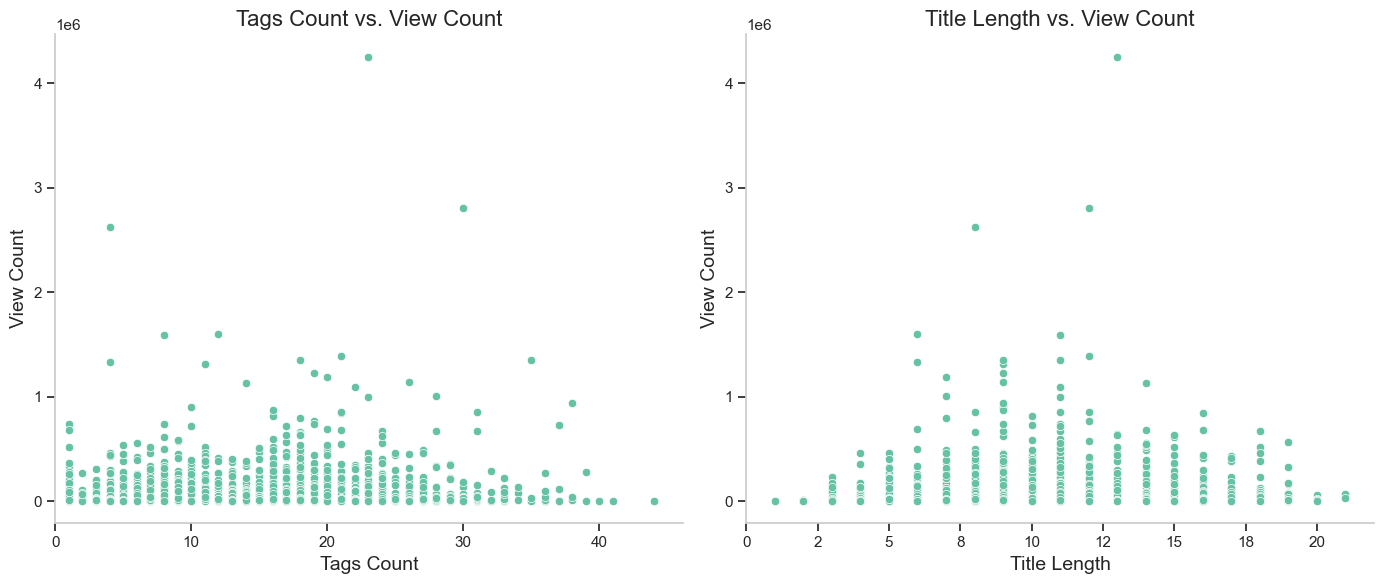

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and color palette for aesthetics
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Create the main figure and subplots grid
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: Tags_Count vs. View_Count
sns.scatterplot(data=youtube_data, x="Tags_Count", y="View_Count", ax=axs[0])
axs[0].set_title("Tags Count vs. View Count", fontsize=16)
axs[0].set_xlabel("Tags Count", fontsize=14)
axs[0].set_ylabel("View Count", fontsize=14)
axs[0].grid(False)  # Remove gridlines
axs[0].set_xlim(0)  # Ensure x-axis starts from 0
axs[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))  # Format x-axis labels
sns.despine(ax=axs[0])

# Second subplot: Title Length vs. View_Count
sns.scatterplot(data=youtube_data, x="Title_Length", y="View_Count", ax=axs[1])
axs[1].set_title("Title Length vs. View Count", fontsize=16)
axs[1].set_xlabel("Title Length", fontsize=14)
axs[1].set_ylabel("View Count", fontsize=14)
axs[1].grid(False)  # Remove gridlines
axs[1].set_xlim(0)  # Ensure x-axis starts from 0
axs[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))  # Format x-axis labels
sns.despine(ax=axs[1])

# Enhance the aesthetics
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [40]:
# most number of likes
pd.set_option('display.max_colwidth', None)
sentiment_data.sort_values(by=['like_count'], ascending=False)[['comment']].head(10)

,comment
40537,Dont become a data analyst if\n\n1 you dont want to hear man i hate mondays and happy friday every week for the rest of your life
39428,Im doing this in Oct 2021 and apparently one of the code chunks where you need to convert new_vaccinations column to integer the sum value now has exceeded 2147483647 So instead of converting it to int you will need to convert to bigint Hope this helps everyone
38854,Alex I watched a lot of your videos I just graduated from college this December Yesterday I was given a job offer as a data analyst and I accepted it Thank you for these videos your efforts are appreciated
39268,You often say that you make videos to help people along their data analyst journey because you didnt have many resources when you started yours Dude I want you to know that you are far exceeding that goal Your videos give me and Im sure many others tremendous value I started this journey back in April and Ive learned so much already I seriously dont know where Id be without your guidance Thank you so much
39603,The future seems to be geared towards self directed learning I mean if Google are doing it surely others will follow soon great video Alex
51782,This is impressive content you have here Theres something Id always share concerning working with a financial professional can actually help you prepare for life financial struggles Im glad I was able to call my coach John Desmond Heppolette since I was actively cashing out from my portfolio and finally made over 370k just in the first quarter while everyone else was crying about the downturn early this year
3032,This is so wild Lukeyou basically shared my personal learning roadmap Started my DA journey in March 2021 Started with Google DA cert then moved on to UCDavis SQL Training then the UCDavis Tableau specialization Already had previous working knowledge of Excel I was able to use these courses to increase my pay by over 50 by quitting teaching and becoming a data analyst Thank you for the recommendations on what are the best Python courses though that is my next target Suppose I can benefit from the Excel course too Thank you for sharing these Crazy to see how my own personal journey matched this video Wish I had this video when I started I had to compare and contrast on these courses on my own
51771,Currently building up skills to eventually try and become a data analyst Enjoyed the dope content should def do some more
40267,I was able to get my first Job as a Data analyst thanks to you youre Awesome Man
68779,I love this video Youre the best And explained and taught me more about this awesome game Keep them coming please Im subscribing You should record while playing with online players


<Figure size 1000x600 with 0 Axes>

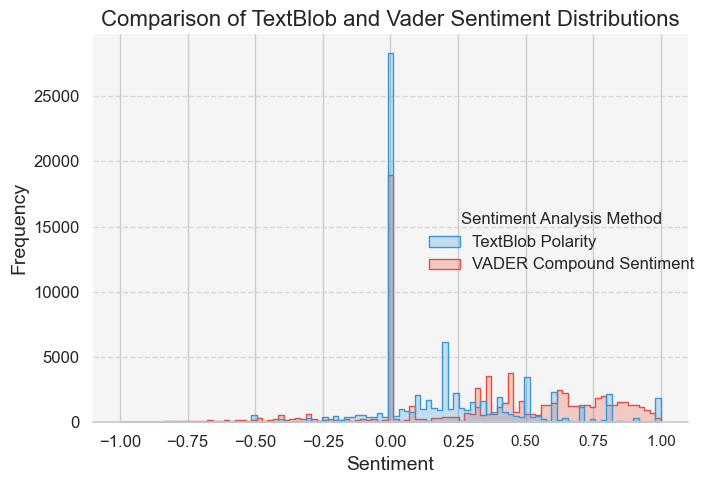

In [41]:
sub = sentiment_data[['comment', 'Textblob Polarity', 'vader_comp_sentiment', 'published_at', 'Video_ID', 'title_len', 'word_count']]

pol_hist = sub.melt(id_vars=['comment', 'published_at', 'Video_ID', 'title_len', 'word_count'], value_vars=['Textblob Polarity', 'vader_comp_sentiment'], var_name='method', value_name='sentiment')

# Create a color palette
palette = {"Textblob Polarity": "#3498db", "vader_comp_sentiment": "#e74c3c"}

# Set up the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.displot(data=pol_hist, x="sentiment", hue="method", element="step", palette=palette)

# Set plot title and labels
plt.title("Comparison of TextBlob and Vader Sentiment Distributions", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Customize legend
plot._legend.set_title("Sentiment Analysis Method")
legend_labels = ["TextBlob Polarity", "VADER Compound Sentiment"]
for t, l in zip(plot._legend.texts, legend_labels):
    t.set_text(l)
    t.set_fontsize(12)

# Customize tick labels and axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize grid and background
plot.despine(left=True)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add a subtle background color
plt.gca().set_facecolor("#f5f5f5")

# Add a watermark or additional info if desired
# plt.text(0.5, 0.5, "Your watermark or info here", fontsize=14, alpha=0.3, ha="center", va="center")

# Display the plot
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

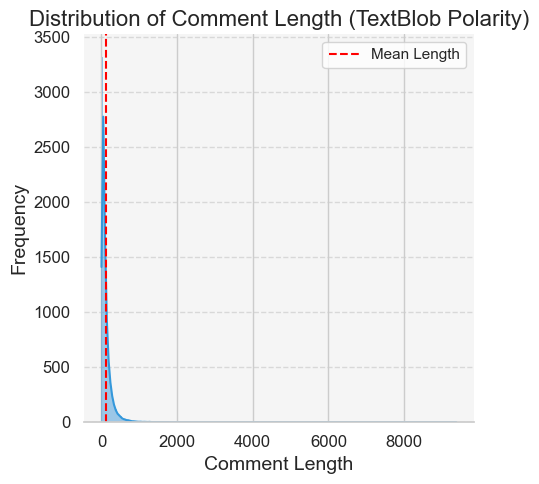

In [42]:
# Filter data for TextBlob Polarity only
only_textblob = pol_hist.query('method == "Textblob Polarity"')

# Set up the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the plot using displot
plot = sns.displot(data=only_textblob, x="title_len", kde=True, color="#3498db")

# Set plot title and labels
plt.title("Distribution of Comment Length (TextBlob Polarity)", fontsize=16)
plt.xlabel("Comment Length", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Customize tick labels and axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize grid and background
plot.despine(left=True)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add a subtle background color
plt.gca().set_facecolor("#f5f5f5")

# Add vertical line for mean comment length
mean_length = only_textblob["title_len"].mean()
plt.axvline(mean_length, color="red", linestyle="--", label="Mean Length")
plt.legend()

# Add a watermark or additional info if desired
# plt.text(0.5, 0.5, "Your watermark or info here", fontsize=14, alpha=0.3, ha="center", va="center")

# Display the plot
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

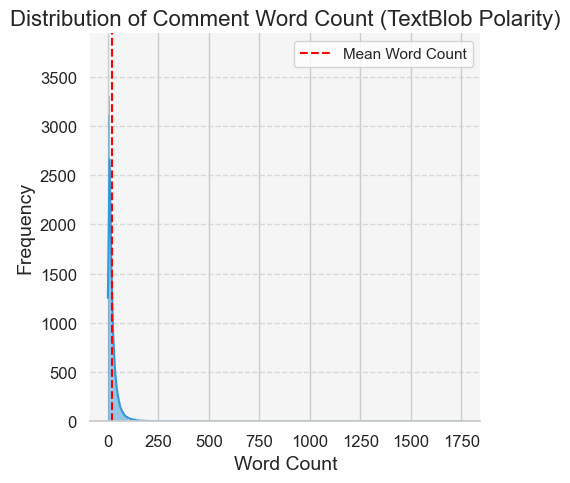

In [43]:

# Filter data for TextBlob Polarity only
only_textblob = pol_hist.query('method == "Textblob Polarity"')

# Set up the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create the plot using displot
plot = sns.displot(data=only_textblob, x="word_count", kde=True, color="#3498db")

# Set plot title and labels
plt.title("Distribution of Comment Word Count (TextBlob Polarity)", fontsize=16)
plt.xlabel("Word Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

# Customize tick labels and axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize grid and background
plot.despine(left=True)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add a subtle background color
plt.gca().set_facecolor("#f5f5f5")

# Add vertical line for mean word count
mean_word_count = only_textblob["word_count"].mean()
plt.axvline(mean_word_count, color="red", linestyle="--", label="Mean Word Count")
plt.legend()


# Display the plot
plt.tight_layout()
plt.show()

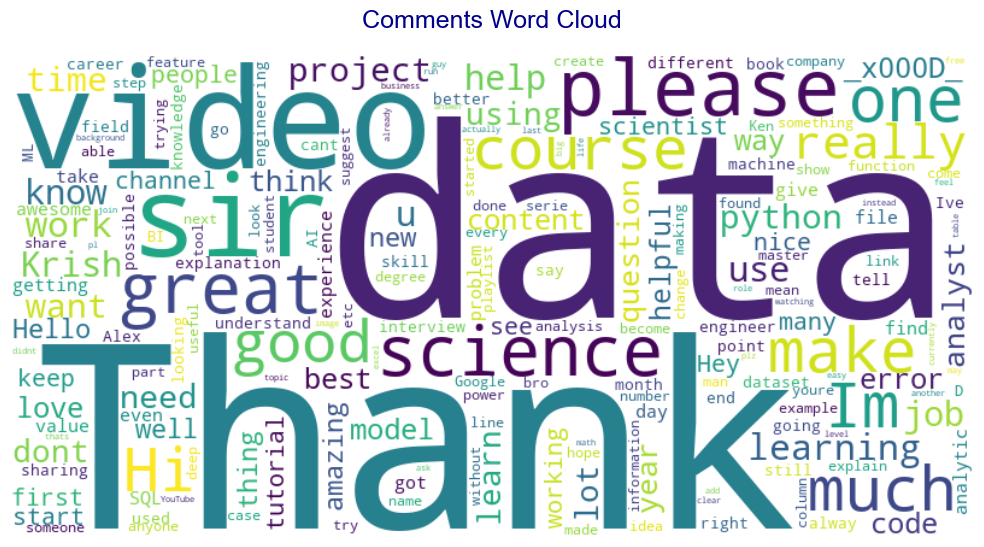

In [86]:

stop_words = set(stopwords.words('english'))
sentiment_data['comment'] = sentiment_data['comment'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in sentiment_data['comment'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

# Create a WordCloud object
wordcloud = WordCloud(width=2000, height=1000, random_state=1, background_color='black',
                    colormap='viridis', collocations=False).generate(all_words_str)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=1, background_color='white',
                      colormap='viridis', collocations=False, contour_color='steelblue').generate(all_words_str)

# Display the word cloud using imshow
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Comments Word Cloud', fontsize=18, color='darkblue', pad=20)  # Customize title appearance
plt.tight_layout()  # Improve spacing
plt.show()

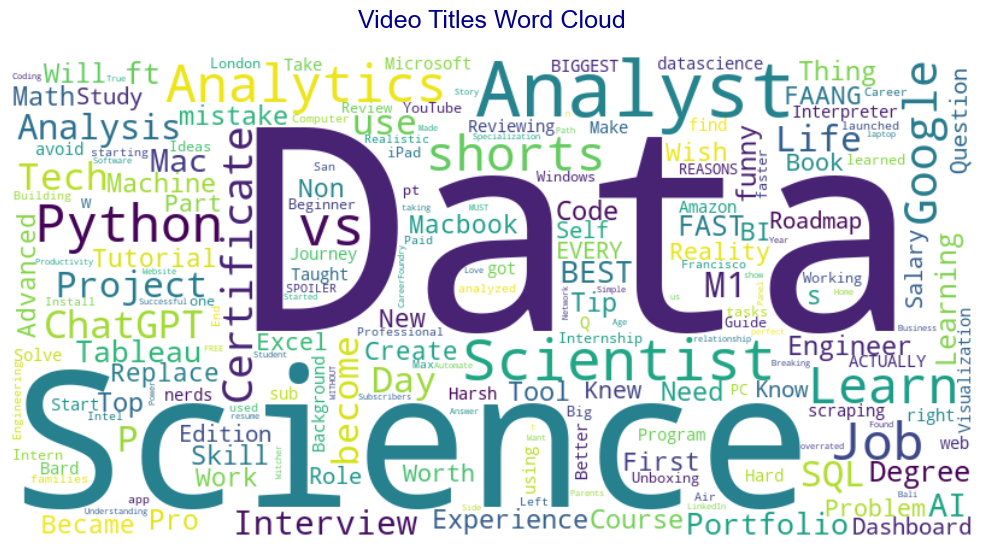

In [87]:
stop_words = set(stopwords.words('english'))
youtube_data['Title'] = sentiment_data['Title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in youtube_data['Title'].tolist() for a in b])
all_words_str = ' '.join(all_words) 

# Create a WordCloud object
wordcloud = WordCloud(width=2000, height=1000, random_state=1, background_color='black',
                    colormap='viridis', collocations=False).generate(all_words_str)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, random_state=1, background_color='white',
                      colormap='viridis', collocations=False, contour_color='steelblue').generate(all_words_str)

# Display the word cloud using imshow
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Video Titles Word Cloud', fontsize=18, color='darkblue', pad=20)  # Customize title appearance
plt.tight_layout()  # Improve spacing
plt.show()